In [1]:
!pip install yfinance matplotlib pandas statsmodels

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 10.7 MB/s  0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached scipy-1.13.1-cp39-cp39-macosx_12_0_arm64.whl.metadata (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 13.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 14.0 MB/s  0:00:00 eta 0:00:01
Using cached scipy-1.13.1-cp39-cp39-macosx_12_0_arm64.whl (30.3 MB)
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15636 sha256=9dc1410f74eee4710dfbebfed8389f9b6b1b7122e05c4293a5b4ac87a28b4ad8
  Stored in directory: /Users/bhaskarkarn/Library/Caches/pip/wheels/98/75/bc/9eaa3cdeaaca347bab26c7e83a7e2f365d82584d65a2d48e7a
  Created wheel for peewee: filename=peewe

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = yf.download("TCS.NS", start="2019-01-01", end="2024-12-31")

/var/folders/6j/lxphv3h16r5_1t75x1vy60m40000gn/T/ipykernel_8234/2297805293.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("TCS.NS", start="2019-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [4]:
# Step 3: Inspect the data
print(data.head())

Price             Close         High          Low         Open   Volume
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS
Date                                                                   
2019-01-01  1616.936401  1623.054681  1601.810510  1611.157945  1094883
2019-01-02  1634.356567  1643.831384  1614.556959  1618.805793  2100463
2019-01-03  1614.514282  1652.753786  1608.693401  1630.702380  2611668
2019-01-04  1594.884644  1615.576442  1564.420527  1614.556764  4280862
2019-01-07  1612.772461  1622.034940  1598.411381  1607.588904  1856423


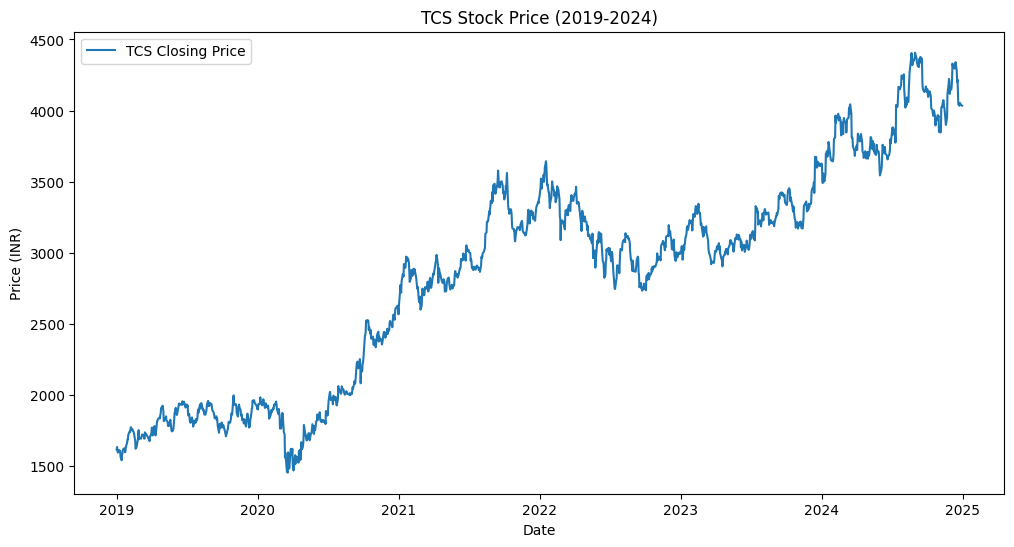

In [5]:
# Step 4: Plot closing price
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='TCS Closing Price')
plt.title("TCS Stock Price (2019-2024)")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.show()

#### 👉 This will give us first time series plot: TCS stock price trend.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

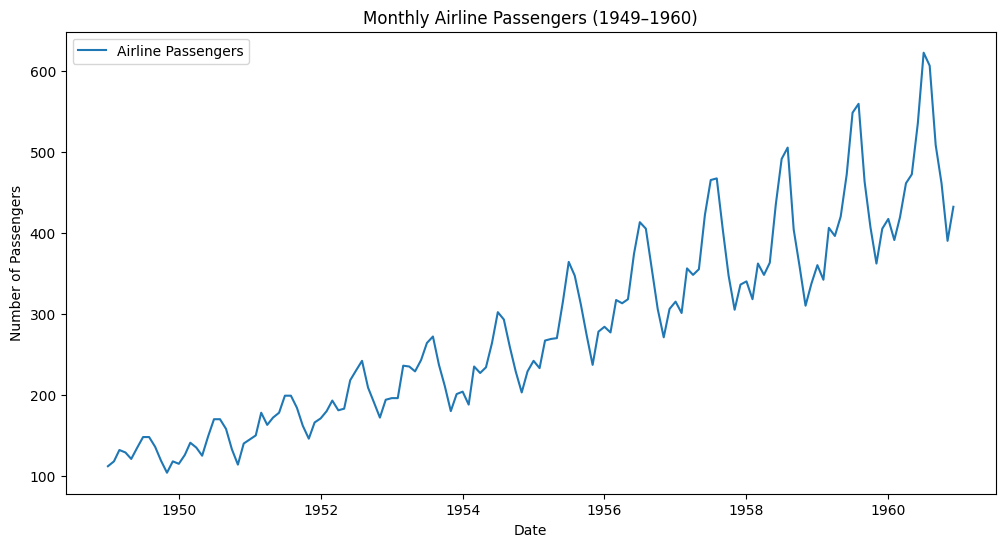

In [8]:
# Plot raw data
plt.figure(figsize=(12,6))
plt.plot(df['Passengers'], label="Airline Passengers")
plt.title("Monthly Airline Passengers (1949–1960)")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

In [9]:
# Decomposition (Multiplicative)
result = seasonal_decompose(df['Passengers'], model='multiplicative')

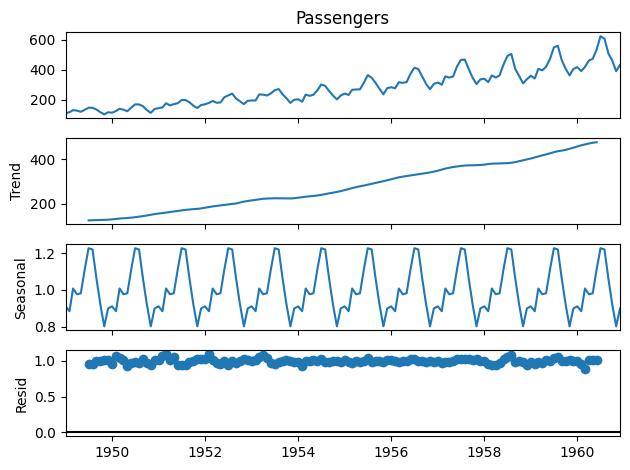

In [10]:
# Plot components
result.plot()
plt.show()

👉 Output will show:

Observed = original series

Trend = long-term growth in passengers

Seasonal = repeating yearly pattern

Residual = noise

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

In [14]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
ts = df['Passengers']

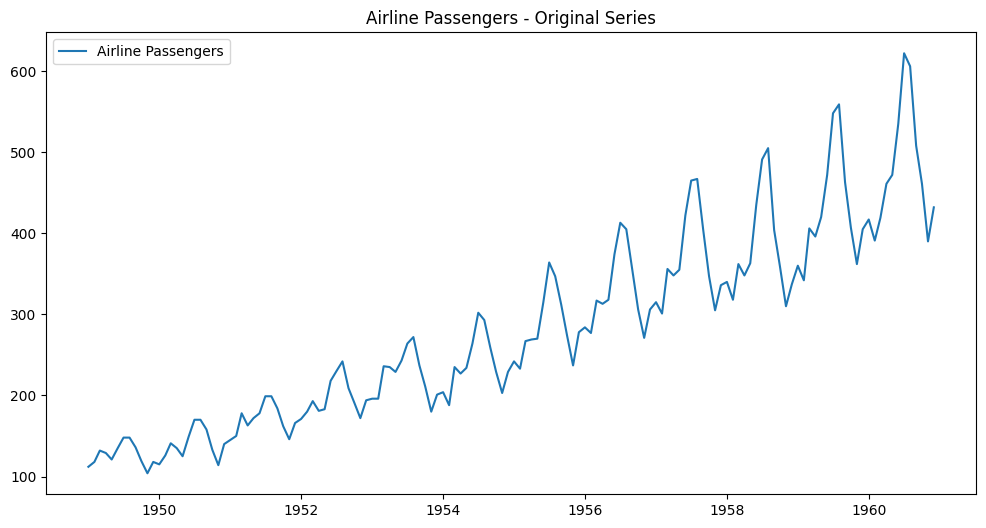

In [15]:
# Plot original data
plt.figure(figsize=(12,6))
plt.plot(ts, label="Airline Passengers")
plt.title("Airline Passengers - Original Series")
plt.legend()
plt.show()

In [16]:
# Rolling Mean & Std
rolmean = ts.rolling(window=12).mean()
rolstd = ts.rolling(window=12).std()

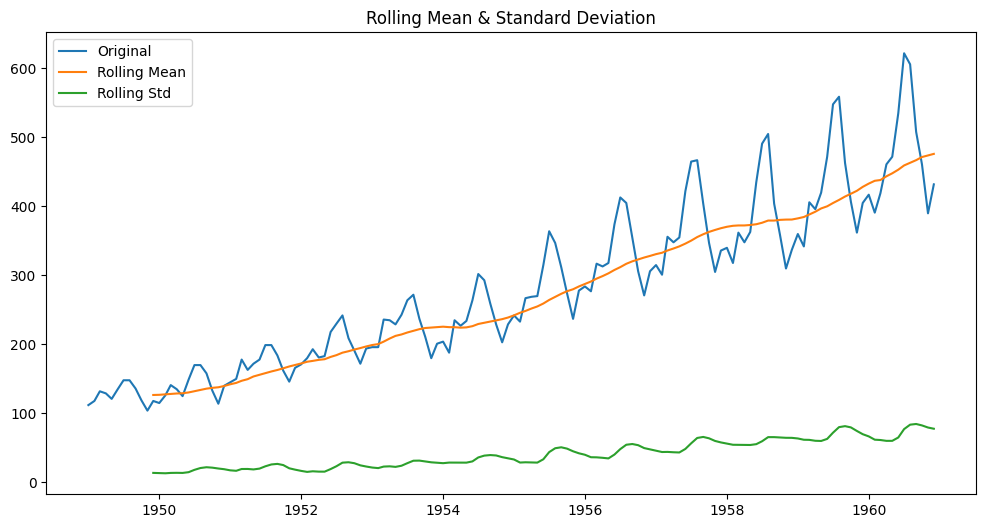

In [17]:
plt.figure(figsize=(12,6))
plt.plot(ts, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolstd, label='Rolling Std')
plt.title("Rolling Mean & Standard Deviation")
plt.legend()
plt.show()

In [18]:
# ADF Test
result = adfuller(ts)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: 0.8153688792060467
p-value: 0.991880243437641


In [19]:
# KPSS Test
stat, p_value, lags, crit = kpss(ts, regression='c')
print("KPSS Statistic:", stat)
print("p-value:", p_value)

KPSS Statistic: 1.6513122354165206
p-value: 0.01


/var/folders/6j/lxphv3h16r5_1t75x1vy60m40000gn/T/ipykernel_8234/1506467554.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, p_value, lags, crit = kpss(ts, regression='c')


👉 Interpretation:

If ADF p-value > 0.05 → non-stationary.

If KPSS p-value < 0.05 → non-stationary.

If both indicate non-stationarity → we need to transform/difference.

In [20]:
ts_log = np.log(ts)              # log transform
ts_diff = ts_log.diff().dropna() # first differencing

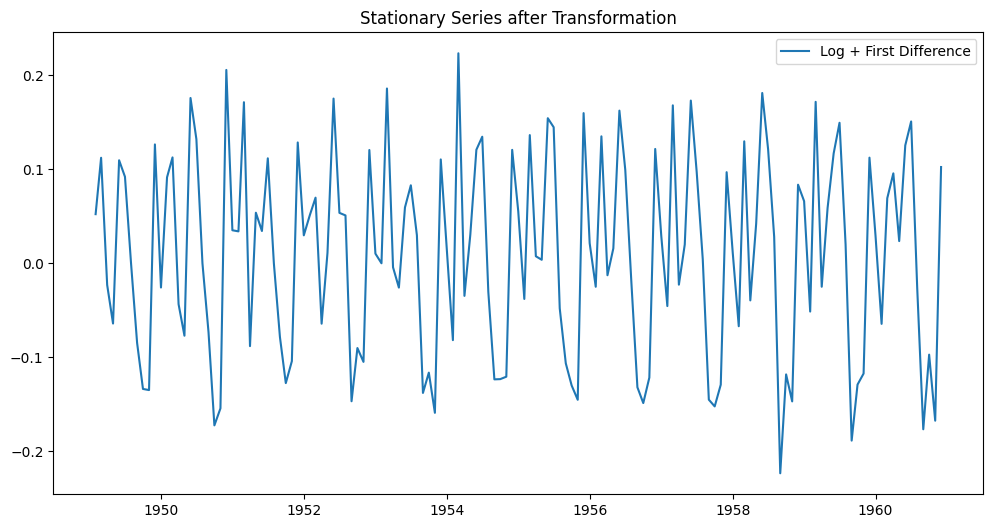

In [21]:
plt.figure(figsize=(12,6))
plt.plot(ts_diff, label="Log + First Difference")
plt.title("Stationary Series after Transformation")
plt.legend()
plt.show()


In [22]:
# Re-test ADF
result = adfuller(ts_diff)
print("ADF p-value after differencing:", result[1])

ADF p-value after differencing: 0.0711205481508586


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [3]:
# Load and transform
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
ts = df['Passengers']

In [4]:
# Log + first differencing (already learned)
ts_log = np.log(ts)
ts_diff = ts_log.diff().dropna()

<Figure size 1200x500 with 0 Axes>

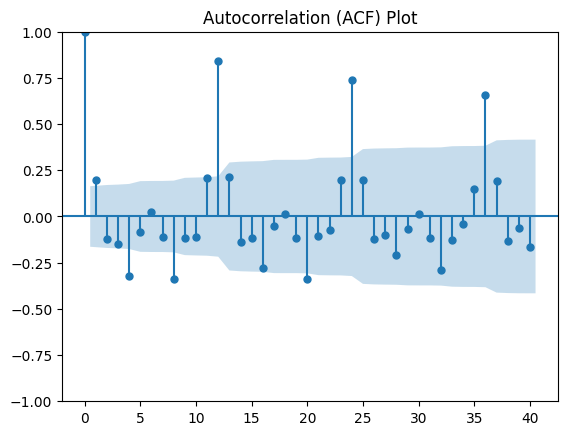

In [5]:
# Plot ACF & PACF
plt.figure(figsize=(12,5))
plot_acf(ts_diff, lags=40)
plt.title("Autocorrelation (ACF) Plot")
plt.show()

<Figure size 1200x500 with 0 Axes>

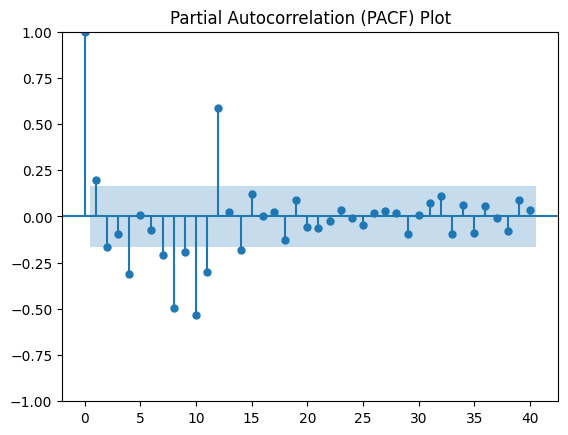

In [6]:
plt.figure(figsize=(12,5))
plot_pacf(ts_diff, lags=40, method='ywm')
plt.title("Partial Autocorrelation (PACF) Plot")
plt.show()

#### Let’s fit an AR(1) model on your differenced (stationary) data.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [8]:
# Load and transform
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
ts = np.log(df['Passengers'])
ts_diff = ts.diff().dropna()


In [9]:
# Fit AR(1)
model = ARIMA(ts, order=(1,1,0))  # (p,d,q)
result = model.fit()

print(result.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 120.299
Date:                Sun, 05 Oct 2025   AIC                           -236.598
Time:                        12:06:08   BIC                           -230.672
Sample:                    01-01-1949   HQIC                          -234.190
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2054      0.093      2.204      0.028       0.023       0.388
sigma2         0.0109      0.002      6.050      0.000       0.007       0.014
Ljung-Box (L1) (Q):                   0.13   Jarque-

/Users/bhaskarkarn/Desktop/TIME SERIES/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhaskarkarn/Desktop/TIME SERIES/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhaskarkarn/Desktop/TIME SERIES/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


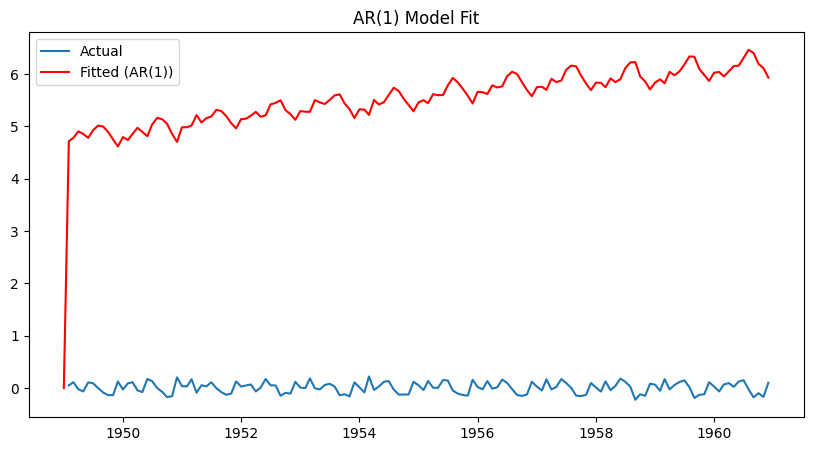

In [10]:
# Plot fitted vs actual
plt.figure(figsize=(10,5))
plt.plot(ts_diff, label="Actual")
plt.plot(result.fittedvalues, color='red', label="Fitted (AR(1))")
plt.legend()
plt.title("AR(1) Model Fit")
plt.show()

In [12]:
# Fit MA(1)
model_ma = ARIMA(ts, order=(0,1,1))  # (p,d,q)
result_ma = model_ma.fit()
print(result_ma.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 121.363
Date:                Sun, 05 Oct 2025   AIC                           -238.725
Time:                        12:09:20   BIC                           -232.800
Sample:                    01-01-1949   HQIC                          -236.317
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2768      0.104      2.668      0.008       0.073       0.480
sigma2         0.0107      0.002      6.286      0.000       0.007       0.014
Ljung-Box (L1) (Q):                   0.15   Jarque-

/Users/bhaskarkarn/Desktop/TIME SERIES/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhaskarkarn/Desktop/TIME SERIES/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhaskarkarn/Desktop/TIME SERIES/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


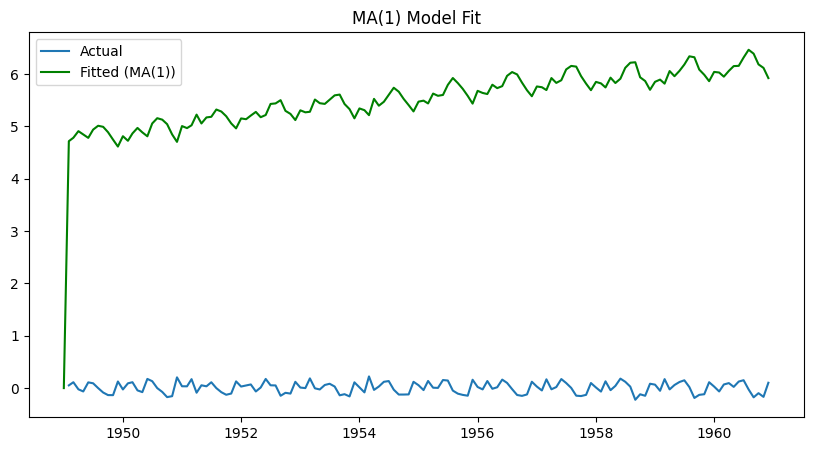

In [13]:
plt.figure(figsize=(10,5))
plt.plot(ts_diff, label="Actual")
plt.plot(result_ma.fittedvalues, color='green', label="Fitted (MA(1))")
plt.legend()
plt.title("MA(1) Model Fit")
plt.show()

In [14]:
# Fit ARMA(1,1) = ARIMA(1,0,1)
model_arma = ARIMA(ts_diff, order=(1,0,1))
result_arma = model_arma.fit()

print(result_arma.summary())


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  143
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 124.804
Date:                Sun, 05 Oct 2025   AIC                           -241.608
Time:                        12:10:12   BIC                           -229.756
Sample:                    02-01-1949   HQIC                          -236.792
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0098      0.010      0.935      0.350      -0.011       0.030
ar.L1         -0.5826      0.170     -3.430      0.001      -0.915      -0.250
ma.L1          0.8502      0.101      8.454      0.0

/Users/bhaskarkarn/Desktop/TIME SERIES/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhaskarkarn/Desktop/TIME SERIES/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhaskarkarn/Desktop/TIME SERIES/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [15]:
print("AIC:", result_arma.aic)
print("BIC:", result_arma.bic)

AIC: -241.60771324960024
BIC: -229.7563347285606


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.index.freq = 'MS'  # monthly start frequency

# Log transform to stabilize variance
ts = np.log(df['Passengers'])


In [17]:
model = SARIMAX(ts,
                order=(1,1,1),
                seasonal_order=(1,1,0,12),
                enforce_stationarity=False,
                enforce_invertibility=False)

result = model.fit()
print(result.summary())


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.50384D+00    |proj g|=  4.38973D+00

At iterate    5    f= -1.51737D+00    |proj g|=  5.39982D-01

At iterate   10    f= -1.52069D+00    |proj g|=  4.02452D-02

At iterate   15    f= -1.52082D+00    |proj g|=  2.38839D-01

At iterate   20    f= -1.52121D+00    |proj g|=  9.28759D-02

At iterate   25    f= -1.52480D+00    |proj g|=  1.09916D+00

At iterate   30    f= -1.52597D+00    |proj g|=  5.46990D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


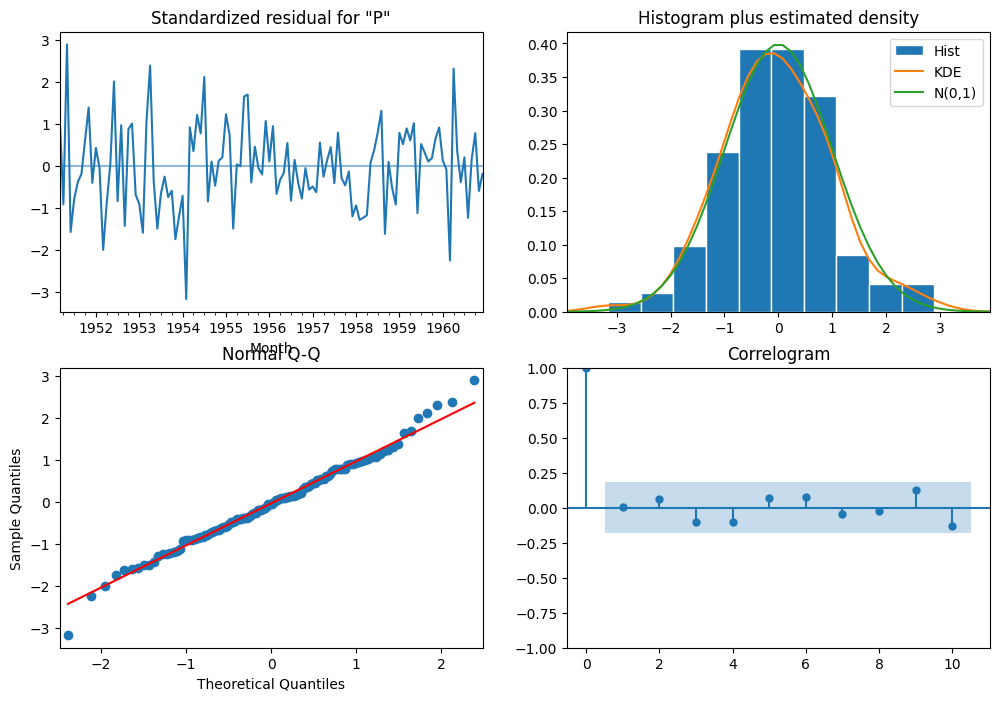

In [18]:
result.plot_diagnostics(figsize=(12,8))
plt.show()

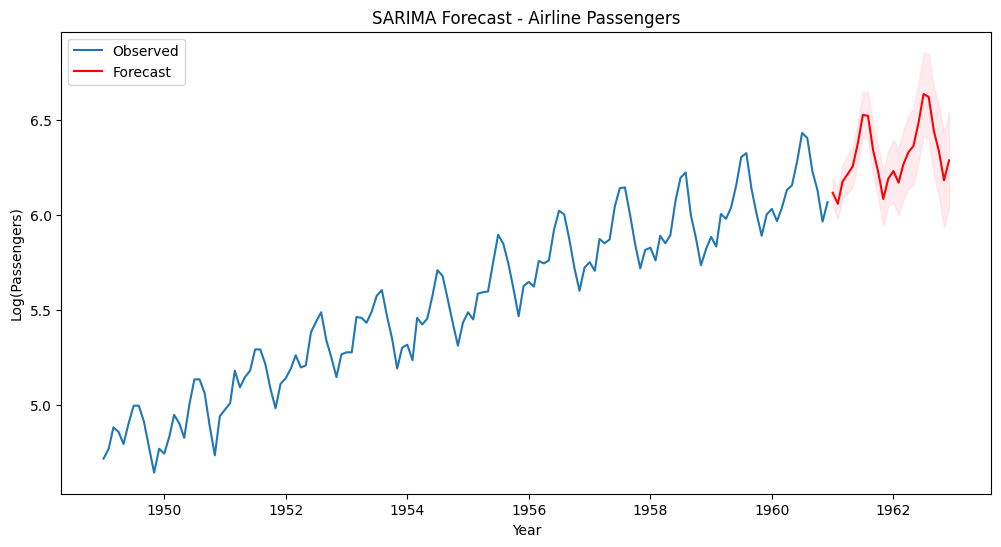

In [19]:
pred = result.get_forecast(steps=24)  # Forecast next 2 years
pred_ci = pred.conf_int()

# Plot
plt.figure(figsize=(12,6))
plt.plot(ts, label='Observed')
plt.plot(pred.predicted_mean, label='Forecast', color='red')
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:,0],
                 pred_ci.iloc[:,1],
                 color='pink', alpha=0.3)
plt.title("SARIMA Forecast - Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Log(Passengers)")
plt.legend()
plt.show()


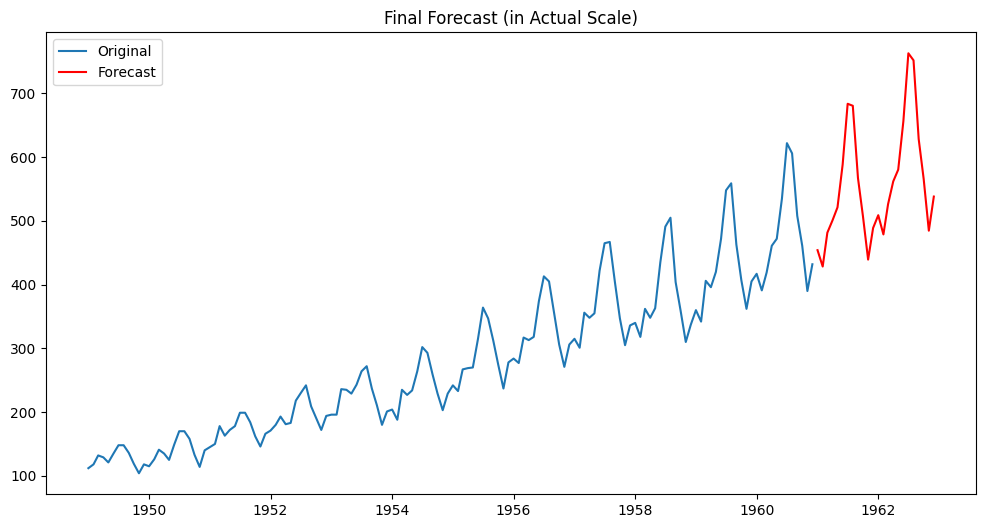

In [20]:
forecast = np.exp(pred.predicted_mean)
plt.figure(figsize=(12,6))
plt.plot(df['Passengers'], label='Original')
plt.plot(forecast, color='red', label='Forecast')
plt.legend()
plt.title("Final Forecast (in Actual Scale)")
plt.show()


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [8]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.index.freq = 'MS'

In [9]:
# Split into train and test (last 24 months for test)
train = df.iloc[:-24]
test = df.iloc[-24:]

In [10]:
# Fit Holt-Winters (Multiplicative)
model_hw = ExponentialSmoothing(
    train['Passengers'],
    trend='add',
    seasonal='mul',
    seasonal_periods=12
)
result_hw = model_hw.fit()

# Forecast next 24 months
forecast = result_hw.forecast(24)

In [23]:
# Fit Holt-Winters (Multiplicative)
model_hw = ExponentialSmoothing(df['Passengers'],
                                trend='add',
                                seasonal='mul',
                                seasonal_periods=12)
result_hw = model_hw.fit()

# Forecast next 24 months
forecast = result_hw.forecast(24)

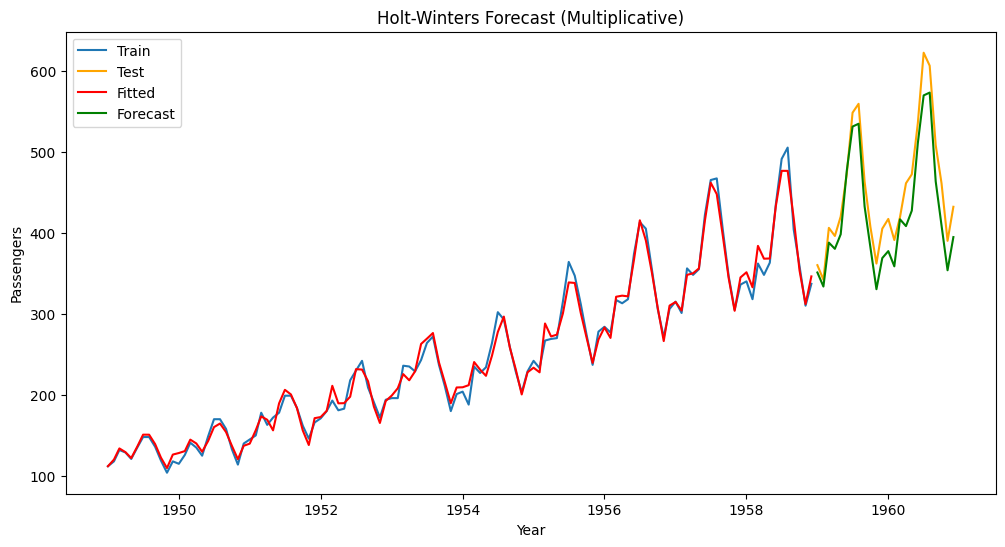

In [11]:
# Plot results
plt.figure(figsize=(12,6))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test', color='orange')
plt.plot(result_hw.fittedvalues, label='Fitted', color='red')
plt.plot(forecast, label='Forecast', color='green')
plt.title("Holt-Winters Forecast (Multiplicative)")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()

In [12]:
# Evaluation
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast) * 100

print("RMSE:", round(rmse, 2))
print("MAPE:", round(mape, 2), "%")


RMSE: 32.49
MAPE: 6.39 %
